In [134]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [47]:
df = pd.read_csv('Guns.csv')
df

,Unnamed: 0,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,state,law
0,1,1977,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552,Alabama,no
1,2,1978,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567,Alabama,no
2,3,1979,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245,Alabama,no
3,4,1980,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829,Alabama,no
4,5,1981,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187,Alabama,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,1169,1995,254.2,2.1,17.9,254,1.485849,73.71621,15.37098,0.478447,14070.160,0.004927,Wyoming,yes
1169,1170,1996,249.7,3.3,20.4,289,1.521814,73.85796,15.44601,0.480085,14032.230,0.004944,Wyoming,yes
1170,1171,1997,255.2,3.5,17.7,310,1.527818,73.92731,15.49400,0.480031,14790.980,0.004943,Wyoming,yes
1171,1172,1998,247.6,4.8,16.2,326,1.558396,73.98515,15.51021,0.480045,15225.510,0.004944,Wyoming,yes


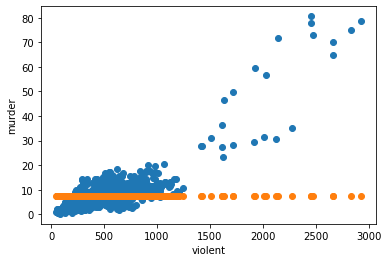

In [88]:
vio = df['violent']
mur = df['murder']

plt.scatter(vio, mur)
plt.xlabel('violent')
plt.ylabel('murder')

plt.scatter(vio, get_predictions(best_model, vio_np))

In [49]:
vio_np = vio.to_numpy()
mur_np = mur.to_numpy()

In [50]:
vio_np.shape, mur_np.shape

((1173,), (1173,))

In [51]:
# sklearn_model = LinearRegression().fit(vio_np.reshape((1173, 1)), vio_np) 
# sklearn_mur_predictions = sklearn_model.predict(vio_np.reshape((1173, 1)))
# sklearn_mur_predictions.shape

(1173,)

In [99]:
# predictions_df = pd.DataFrame({'violent':vio,
#                               'murder':mur,
#                               'sklearn_mur_predictions':sklearn_mur_predictions})

# predictions_df['Our Model Predictions'] = get_predictions(best_model, vio_np)
# predictions_df

,violent,murder,sklearn_mur_predictions,Our Model Predictions
0,414.4,14.2,414.4,7.665132
1,419.1,13.3,419.1,7.665132
2,413.3,13.2,413.3,7.665132
3,448.5,13.2,448.5,7.665132
4,470.5,11.9,470.5,7.665132
...,...,...,...,...
1168,254.2,2.1,254.2,7.665132
1169,249.7,3.3,249.7,7.665132
1170,255.2,3.5,255.2,7.665132
1171,247.6,4.8,247.6,7.665132


In [63]:
def get_predictions(model, x):
    
    alpha_hat = model['alpha_hat']
    beta_hat = model['beta_hat']
    
    return alpha_hat + beta_hat * x

In [90]:
# test_model = {'alpha_hat':1, 'beta_hat':1}
# test_x = np.array([1, 2, 3])
# get_predictions(test_model, test_x)

array([2, 3, 4])

In [91]:
def mean_squared_error(y, y_predictions):
    n=len(y)
    return np.sum(np.square(y - y_predictions)) / n


In [92]:
def mean_absolute_error(y, y_predictions):
    n=len(y)
    return np.sum(np.abs(y - y_predictions)) / n

In [93]:
mse1 = mean_squared_error(get_predictions(test_model, vio_np), mur)
mse1

353971.71401534526

In [94]:
mae1 = mean_absolute_error(get_predictions(test_model, vio_np), mur)
mae1

496.40954816709285

In [95]:
# def get_best_model(x, y):
#     x_bar = np.average(x)
#     y_bar = np.average(y)
    
#     top = np.sum((x - x_bar)-(y - y_bar))
#     bot = np.sum((x - x_bar)**2)
#     beta_hat = top / bot
    
#     alpha_hat = y_bar - beta_hat * x_bar
    
#     model = {'alpha_hat':alpha_hat, 'beta_hat':beta_hat}
#     return model

In [96]:
best_model = get_best_model(vio_np, mur_np)
best_model

{'alpha_hat': 7.665132139812448, 'beta_hat': 1.6667494026262782e-19}

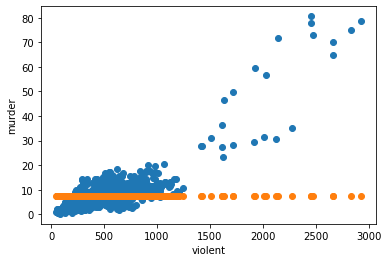

In [97]:
vio = df['violent']
mur = df['murder']

plt.scatter(vio, mur)
plt.xlabel('violent')
plt.ylabel('murder')

plt.scatter(vio, get_predictions(best_model, vio_np))

In [101]:
mean_absolute_error(predictions_df['violent'],
                   predictions_df['Our Model Predictions'])

495.40954816709296

## Multiple Linear Regression

In [124]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [125]:
df.corr()['total_bedrooms']

longitude             0.069608
latitude             -0.066983
housing_median_age   -0.320451
total_rooms           0.930380
total_bedrooms        1.000000
population            0.877747
households            0.979728
median_income        -0.007723
median_house_value    0.049686
Name: total_bedrooms, dtype: float64

In [126]:
bedrooms = df['total_bedrooms']
df = df.drop(['latitude', 'housing_median_age', 'total_bedrooms', 'longitude', 'median_income', 'median_house_value'], axis=1)
df['bedrooms'] = bedrooms
df

,total_rooms,population,households,ocean_proximity,bedrooms
0,880.0,322.0,126.0,NEAR BAY,129.0
1,7099.0,2401.0,1138.0,NEAR BAY,1106.0
2,1467.0,496.0,177.0,NEAR BAY,190.0
3,1274.0,558.0,219.0,NEAR BAY,235.0
4,1627.0,565.0,259.0,NEAR BAY,280.0
...,...,...,...,...,...
20635,1665.0,845.0,330.0,INLAND,374.0
20636,697.0,356.0,114.0,INLAND,150.0
20637,2254.0,1007.0,433.0,INLAND,485.0
20638,1860.0,741.0,349.0,INLAND,409.0


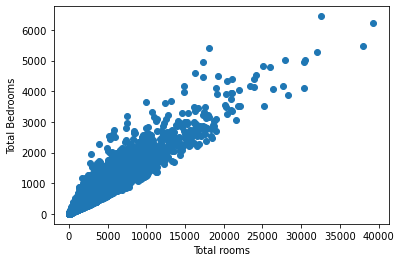

In [127]:
plt.scatter(df['total_rooms'], df['bedrooms'])
plt.xlabel('Total rooms')
plt.ylabel('Total Bedrooms')
plt.show()

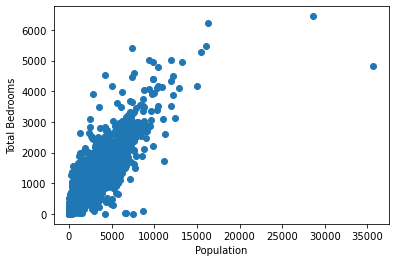

In [128]:
plt.scatter(df['population'], df['bedrooms'])
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.show()

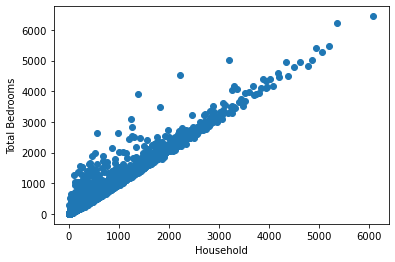

In [129]:
plt.scatter(df['households'], df['bedrooms'])
plt.xlabel('Household')
plt.ylabel('Total Bedrooms')
plt.show()

In [130]:
df_np = df.to_numpy()
df_np.shape

(20640, 5)

In [131]:
x_train, y_train = df_np[:, :3], df_np[:, -1]
x_train.shape, y_train.shape

((20640, 3), (20640,))

In [132]:
x_train

array([[880.0, 322.0, 126.0],
       [7099.0, 2401.0, 1138.0],
       [1467.0, 496.0, 177.0],
       ...,
       [2254.0, 1007.0, 433.0],
       [1860.0, 741.0, 349.0],
       [2785.0, 1387.0, 530.0]], dtype=object)